# Geometric data manipulations

Here we demonstrate some of the most common geometry manipulation functions available in geopandas. We will use the Helsinki Region Travel Time Matrix as example data for geometric manipulations. The Travel Time Matrix constist of 13231 statistical grid squares (250m x 250m) from the Helsinki Region in Southern Finland and we will learn how to generate centroids, different outlines and buffer zones for these polygons. 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

input_folder = Path("../data/Helsinki")
fp = input_folder / "TravelTimes_to_5975375_RailwayStation.shp"

data = gpd.read_file(fp)
data.head(2)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."


The attribute columns contain information about travel times and distances by car, public transport and walking across the region. For now, we are only interested in the geometry column of the data that contains the polygon geometry of the grid squares. Remember, that the data type of the geometry-column a `GeoDataFrame` is `GeoSeries` and individual geometries are eventually shapely objects, we can use all of shapely's tools for geometry manipulation directly via geopandas.

In [2]:
data["geometry"].head()

0    POLYGON ((382000.000 6697750.000, 381750.000 6...
1    POLYGON ((382250.000 6697750.000, 382000.000 6...
2    POLYGON ((382500.000 6697750.000, 382250.000 6...
3    POLYGON ((382750.000 6697750.000, 382500.000 6...
4    POLYGON ((381250.000 6697500.000, 381000.000 6...
Name: geometry, dtype: geometry

In [3]:
type(data["geometry"])

geopandas.geoseries.GeoSeries

In [4]:
type(data["geometry"].values[0])

shapely.geometry.polygon.Polygon

Let's first plot the original geometry of the grid squares. We use the in-built plotting function in geopandas to plot the geometries, and `matplotlib.pyplot` to turn off axis lines and labels.

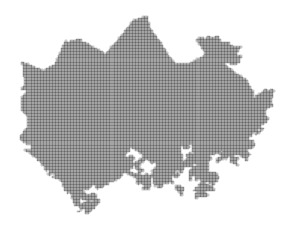

In [5]:
data.plot(facecolor="none", linewidth=0.2)

plt.axis("off")
plt.show()

## Centroid

Extracting the centroid of geometric features is useful in many cases. In this case, the values in the Travel Time Matrix data set have been originally calculated for the grid square centroids, and we can extract these point locations via the `centroid`-attribute of the geometry-column. 

In [6]:
data["geometry"].centroid

0        POINT (381875.000 6697875.000)
1        POINT (382125.000 6697875.000)
2        POINT (382375.000 6697875.000)
3        POINT (382625.000 6697875.000)
4        POINT (381125.000 6697625.000)
                      ...              
13226    POINT (372875.000 6665625.000)
13227    POINT (373125.000 6665625.000)
13228    POINT (372375.000 6665375.000)
13229    POINT (372625.000 6665375.000)
13230    POINT (372875.000 6665375.000)
Length: 13231, dtype: geometry

We can also apply the method directly to the `GeoDataFrame` to achieve the same result.

In [7]:
data.centroid

0        POINT (381875.000 6697875.000)
1        POINT (382125.000 6697875.000)
2        POINT (382375.000 6697875.000)
3        POINT (382625.000 6697875.000)
4        POINT (381125.000 6697625.000)
                      ...              
13226    POINT (372875.000 6665625.000)
13227    POINT (373125.000 6665625.000)
13228    POINT (372375.000 6665375.000)
13229    POINT (372625.000 6665375.000)
13230    POINT (372875.000 6665375.000)
Length: 13231, dtype: geometry

We can then plot the centroids for a visual check.

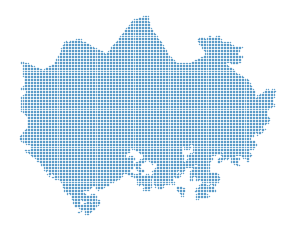

In [8]:
data.centroid.plot(markersize=0.1)

plt.axis("off")
plt.show()

## Unary union

We can generate a joint outline for the 13231 grid squares through creating a geometric union among all geometries in the data. This could be useful, for example, for visualizing the outlines of a study area. The `unary_union` returns a single geometry object, which is automatically visualized when running the code in a Jupyter Notebook, so we don't need to use any additional plotting tools in this case.

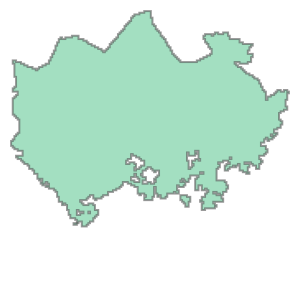

In [9]:
# Polygon centroids
data.unary_union

In [10]:
type(data.unary_union)

shapely.geometry.multipolygon.MultiPolygon

## Simplifying geometries

Geometry simplification is a useful process especially when visualizing data that has very detailed geometry. With our sample data, we can generate simplified version of the outline extent. The tolerance parameter controls the level of simplification.

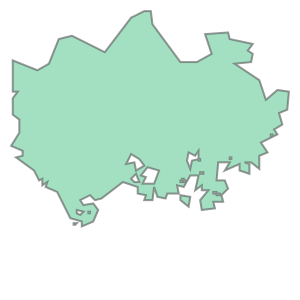

In [11]:
data.unary_union.simplify(tolerance=500)

## Bounding polygon

Sometimes it is enough to describe the approximate extent of the data using a bounding polygon. A minimum bounding rectangle, also called a bounding box or an envelope is the smallest rectangular polygon surrounding a geometric object. In a `GeoDataFrame`, the `envelope` attribute returns the bounding rectangle for each geometry.

In [12]:
data.envelope

0        POLYGON ((381750.000 6697750.000, 382000.000 6...
1        POLYGON ((382000.000 6697750.000, 382250.000 6...
2        POLYGON ((382250.000 6697750.000, 382500.000 6...
3        POLYGON ((382500.000 6697750.000, 382750.000 6...
4        POLYGON ((381000.000 6697500.000, 381250.000 6...
                               ...                        
13226    POLYGON ((372750.000 6665500.000, 373000.000 6...
13227    POLYGON ((373000.000 6665500.000, 373250.000 6...
13228    POLYGON ((372250.000 6665250.000, 372500.000 6...
13229    POLYGON ((372500.000 6665250.000, 372750.000 6...
13230    POLYGON ((372750.000 6665250.000, 373000.000 6...
Length: 13231, dtype: geometry

In order to get the bounding rectangle for the whole layer, we  first create an union of all geometries using `unary_union`, and then create the bounding rectangle for that polygon.

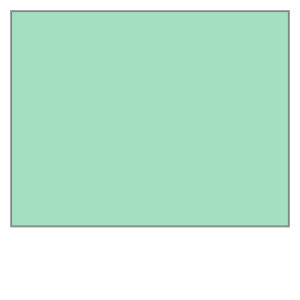

In [13]:
data.unary_union.envelope

Corner coordinates of the bounding box for a `GeoDataFrame` can be fetched via the `total_bounds` attribute. The `bounds` attribute returns the bounding coordinates of each feature.

In [14]:
data.total_bounds

array([ 361500.00014042, 6665250.00004393,  403750.00013197,
       6698000.00003802])

In [15]:
data.bounds.head()

,minx,miny,maxx,maxy
0,381750.000136,6.697750e+06,382000.000136,6.698000e+06
1,382000.000136,6.697750e+06,382250.000136,6.698000e+06
2,382250.000136,6.697750e+06,382500.000136,6.698000e+06
3,382500.000136,6.697750e+06,382750.000136,6.698000e+06
4,381000.000136,6.697500e+06,381250.000136,6.697750e+06


### Convex hull

A bit more detailed delineation of the data extent can be extracted using a convex hull which represents the smalles possible polygon that contains all points in an object. For a single grid square in our data, the convex hull would be identical to the polygon geometry due to it's square shape. In order to create a covex hull for all grid squares, we need to first create an union of all polygons. 

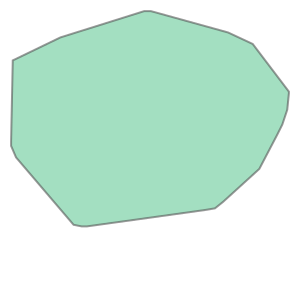

In [16]:
data.unary_union.convex_hull

## Buffer

Buffering is a common spatial operation that has a multitude of use cases in spatial analyses. In the case of the Travel Time Matrix data, the original analysis has been conducted using a buffer zone in order to include routes outside the study area into the analysis to avoid edge-effects. We can extract the original analysis extent by buffering the data extent. The distance parameter in the `buffer` function defines the radius or the buffer in meters (according to the coordinate reference system of the data).

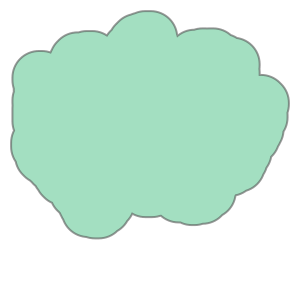

In [17]:
# 5 km buffer for the travel time matrix extent
data.unary_union.buffer(5000)



## Dissolving and merging geometries

Data aggregation refers to a process where we combine data into groups. Spatial data aggregation refers to combining geometries into coarser spatial units based on some attributes. The process may also include the calculation of summary statistics. A simple example of spatial data aggregation would be to combine national borders by continent.

In pandas, we learned how to group and aggregate data using the `groupby`method. In geopandas, there is a function called `dissolve()` that groups the data based on an anttribute column and unions the geometries for each group in that attribute. 

At this point, we will make use of the attribute columns in the data. We will aggregate our travel time data by car travel times (column `car_r_t`) so that the grid cells that have the same travel time to Railway Station will be merged together.

In [18]:
# Conduct the aggregation
dissolved = data.dissolve(by="car_r_t")

# What did we get
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t
car_r_t,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((372500.000 6665250.000, 372250...",-1,-1,-1,5797069,-1,-1,-1,-1,-1,-1,-1,-1,-1
0,"POLYGON ((386000.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0
7,"POLYGON ((385750.000 6671750.000, 385500.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6
8,"MULTIPOLYGON (((385500.000 6671500.000, 385500...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10
9,"MULTIPOLYGON (((385000.000 6671750.000, 385250...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18


The column used for dissolving the data (`car_r_t`) can now be found in the index and the numbers in this index are the unique travel time values found in that column. Note that `-1` represents `NoData`.

In [19]:
dissolved.index

Int64Index([-1,  0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
            56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
            73, 74, 75, 76, 77, 78, 79],
           dtype='int64', name='car_r_t')

The dissolved data should have as many rows of data as there were unique values in the column - one row for each unique value. Let's compare the number of cells in the layers before and after the aggregation.

In [20]:
print("Rows in original intersection GeoDataFrame:", len(data))
print("Rows in dissolved layer:", len(dissolved))

Rows in original intersection GeoDataFrame: 13231
Rows in dissolved layer: 75


Indeed the number of rows in our data has decreased. For each row, the original polygon geometries have been dissolved.  Let's inspect the regions with exactly 15 minutes travel distance to the railway station.

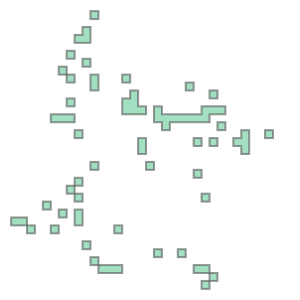

In [21]:
dissolved.loc[15, "geometry"]

The grid squares with `car_r_t` equal to 15 have been dissolved into a signle `MultiPolygon` object.

In [22]:
import geopandas as gpd

# File path
fp = "data/Amazon_river.shp"
data = gpd.read_file(fp)

# Print crs
print(data.crs)

# Plot the river
data.plot()

DriverError: data/Amazon_river.shp: No such file or directory

The LineString that is presented here is quite detailed, so let's see how we can generalize them a bit. As we can see from the coordinate reference system, the data is projected in a metric system using [Mercator projection based on SIRGAS datum](http://spatialreference.org/ref/sr-org/7868/). 

- Generalization can be done easily by using a Shapely function called `.simplify()`. The `tolerance` parameter can be used to adjusts how much geometries should be generalized. **The tolerance value is tied to the coordinate system of the geometries**. Hence, the value we pass here is 20 000 **meters** (20 kilometers).

In [ ]:
# Generalize geometry
data["geom_gen"] = data.simplify(tolerance=20000)

# Set geometry to be our new simlified geometry
data = data.set_geometry("geom_gen")

# Plot
data.plot()

Nice! As a result, now we have simplified our LineString quite significantly as we can see from the map.


